## PROCAR Fat Band Projected Band Structure Plotter

This notebook was created to plot "fat band" style band structure plots, using atom-projected eigenvalues. There are 2 kinds of input needed to run this notebook:
1. PBAND_{element}_SOC.dat file(s)
2. KLABELS file

Both of these files are produced Vaspkit (https://vaspkit.com/) using option 213 ("Projected Band Structure of Each Element"). To generate a plot, run this notebook in the same folder where the input files are located. Input variables are:
1. element
    - Name of the element for projection. NOTE: You *must* have a corresponding PBAND_{element}_SOC.dat file.
2. ylim (-1 to 1)
    - Energy range to plot in eV
3. xlim (None)
    - k-point range to plot. Inspect KLABELS file if you want to zoom to a specific section, otherwise full path is plotted
4. band_color ('lightcoral')
    - fill color for the fat bands. suggested colors include 'lightcoral','lightblue','lightgreen','lightgray', and 'plum'
5. fatband_scale (0.1)
    - scalar for the width of the fatbands. Larger -> fatter
6. figsize (12 by 5)
    - figure size (w x h)
7. savefig_filename (None)
    - if defined, will save the output file as an image in the working directory. use '.png' or '.jpg'
    
Library dependencies:
1. numpy (https://numpy.org/)
2. matplotlib (https://matplotlib.org/)

In [1]:
def plot_fatbands(element,ylim=[-1,1],xlim=None,band_color='lightcoral',fatband_scale=0.1,figsize=(12,5),savefig_filename=None):
    import numpy as np
    import matplotlib.pyplot as plt
    
    # open and read PBAND file
    pband_file = open(f'PBAND_{element}.dat')
    pband_lines = pband_file.readlines()
    nkpts,nbands = int(pband_lines[1][17:21]),int(pband_lines[1][21:25])
    
    # initialize distance, energy, and marker size arrays
    distances, energies, size =np.zeros((nbands,nkpts)),np.zeros((nbands,nkpts)),np.zeros((nbands,nkpts))
    
    # determine the indices in the readlines() output where each new band starts
    band_indices = [2+(nkpts+2)*b for b in range(nbands)]
    
    # store information from PBAND file as variables
    for i,band_index in enumerate(band_indices):
        for j,kpt in enumerate(pband_lines[band_index+1:band_index+nkpts+1]):
            distance   = float(kpt[0:10])
            energy     = float(kpt[10:24])
            s,py,pz,px = float(kpt[24:31]),float(kpt[31:38]),float(kpt[38:45]),float(kpt[45:52])
            dxy,dyz,dz2,dxz,dx2 = float(kpt[52:59]),float(kpt[59:66]),float(kpt[66:73]),float(kpt[73:80]),float(kpt[80:87]) 
            tot        = float(kpt[87:94])
            distances[i][j],energies[i][j] = distance,energy
            size[i][j] = tot
            
    # read in KLABELS file for labels and distances
    klabels_file = open('KLABELS')
    klabels_lines = klabels_file.readlines()
    label_distances = []
    label_labels    = []
    for line in klabels_lines[1:]:
        if line != ' \n':
            label_labels.append(line[:12].strip())
            label_distances.append(float(line[12:24]))
        if line == ' \n': break

    # plot the fat band structure        
    plt.figure(figsize=figsize)
    plt.title(f'{element} Projected Band Structure')
    plt.xlabel('k-path')
    plt.ylabel('Energy (eV)')
    plt.ylim(ylim)
    plt.xticks(ticks=label_distances,labels=label_labels)
    plt.vlines(label_distances,ymin=energies.min(),ymax=energies.max(),alpha=0.3,color='k',linewidth=0.5)
    for band in range(len(energies)):
        plt.fill_between(distances[band],energies[band]+size[band]*fatband_scale,energies[band]-size[band]*fatband_scale,color=band_color,edgecolor='k',linewidth=0.3)   
    if xlim != None: plt.xlim(xlim)
    if xlim == None: plt.xlim(0,distances.max())
    if savefig_filename != None: plt.savefig(f'{savefig_filename}')
    plt.show()

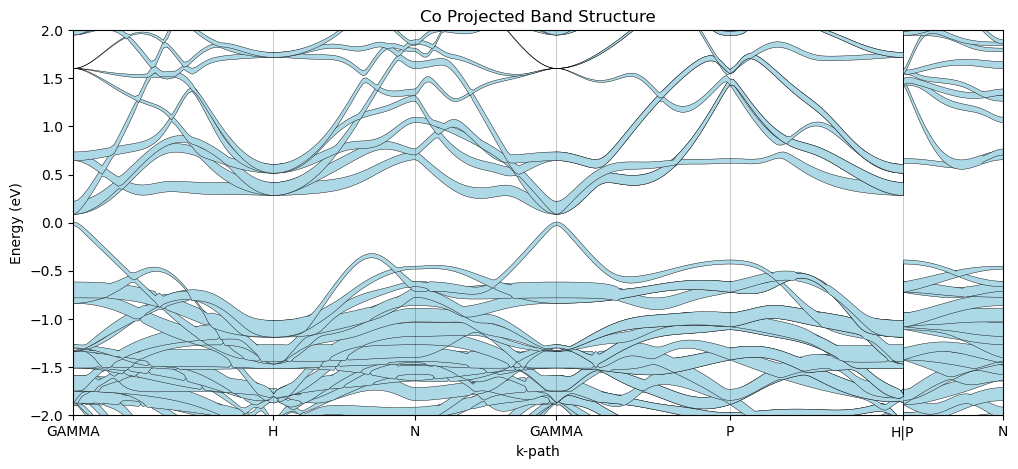

In [6]:
plot_fatbands('Co',ylim=[-2,2],band_color='lightblue',savefig_filename='CoSb3_Co-BS.png')

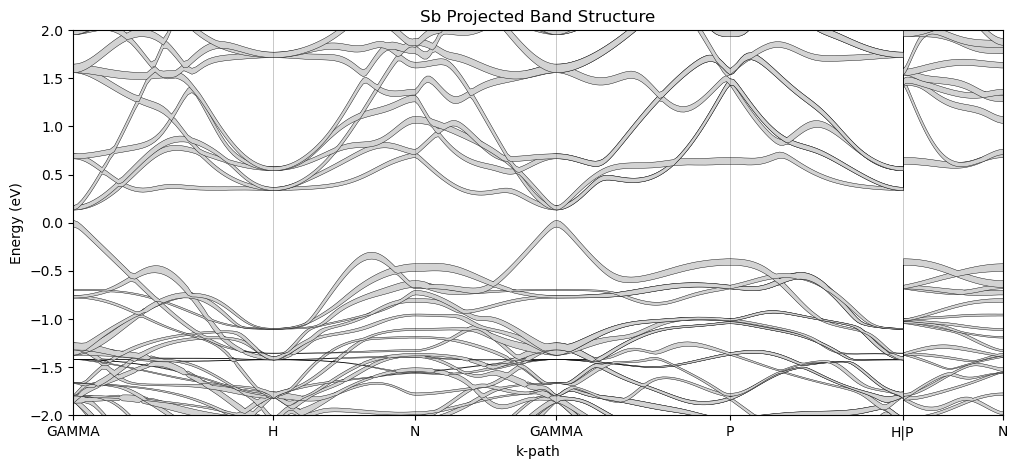

In [7]:
plot_fatbands('Sb',ylim=[-2,2],band_color='lightgray',savefig_filename='CoSb3_Sb-BS.png')